<a href="https://colab.research.google.com/github/mmalinas/DeepLearning/blob/master/deeplearning_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q keras
import keras
import glob
from random import shuffle
import h5py
import numpy as np
import cv2
import math
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.2 GB  | Proc size: 1.1 GB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


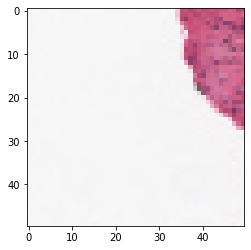

In [26]:
img = cv2.imread('/content/drive/My Drive/breast-histopathology-images/8863/0/8863_idx5_x51_y1251_class0.png')
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [0]:
src_filepath_pattern = '/content/drive/My Drive/breast-histopathology-images/*/*/*'
dest_filepath = '/content/drive/My Drive/breast-normalized-dataset_'
n_px = 50
n_channels = 3

src_filepaths = glob.glob(src_filepath_pattern, recursive=True)

labels = [0 if 'class0' in filepath else 1 for filepath in src_filepaths]

t = list(zip(src_filepaths, labels))

shuffle(t)

src_filepaths, labels = zip(*t)

m = len(src_filepaths) 
n_complete_batches = math.ceil(m / 1024)

print(m)

[]
